In [242]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from mlxtend.regressor import StackingRegressor

from sklearn.externals import *

In [250]:
from google.colab import files

uploaded = files.upload()

Saving too_bt.csv to too_bt (1).csv


In [251]:
df= pd.read_csv("combined_all_final_data.csv")
df

,Unnamed: 0,mac,src,dest,start_time,end_time
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00
1,1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00
2,2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00
3,3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00
4,4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00
...,...,...,...,...,...,...
3198637,53775,45766.0,bt119,bt117,2021-11-24 20:30:00,2021-11-24 20:30:00
3198638,53776,45766.0,bt134,bt133,2021-11-26 07:38:00,2021-11-26 07:41:00
3198639,53777,45768.0,bt161,bt164,2021-12-11 11:40:00,2021-12-11 11:42:00
3198640,53778,45769.0,bt144,bt109,2021-11-19 13:44:00,2021-11-19 13:45:00


In [252]:
df.dropna(inplace = True)
df

,Unnamed: 0,mac,src,dest,start_time,end_time
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00
1,1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00
2,2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00
3,3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00
4,4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00
...,...,...,...,...,...,...
3198636,53774,45766.0,bt145,bt119,2021-06-11 11:25:00,2021-06-11 11:26:00
3198637,53775,45766.0,bt119,bt117,2021-11-24 20:30:00,2021-11-24 20:30:00
3198638,53776,45766.0,bt134,bt133,2021-11-26 07:38:00,2021-11-26 07:41:00
3198639,53777,45768.0,bt161,bt164,2021-12-11 11:40:00,2021-12-11 11:42:00


In [253]:
df = df[df["mac"].str.contains("mac") == False]
df

,Unnamed: 0,mac,src,dest,start_time,end_time
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00
1,1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00
2,2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00
3,3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00
4,4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00
...,...,...,...,...,...,...
3145723,861,38884,bt147,bt146,2021-11-14 17:21:00,2021-11-14 17:22:00
3145724,862,38884,bt148,bt149,2021-11-14 18:02:00,2021-11-14 18:04:00
3145725,863,38884,bt147,bt153,2021-11-14 19:34:00,2021-11-14 19:58:00
3145726,864,38884,bt153,bt146,2021-11-15 00:32:00,2021-11-15 00:33:00


In [254]:
df.sort_values(['mac', 'start_time'],ascending=[True,True], inplace=True)
df

,Unnamed: 0,mac,src,dest,start_time,end_time
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00
1,1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00
2,2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00
3,3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00
4,4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00
...,...,...,...,...,...,...
599375,10121,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00
599376,10122,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00
599377,10123,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00
599378,10124,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00


In [255]:
df1= pd.read_csv("fromm_bt.csv")
df1

,src,from
0,bt100,Matam
1,bt101,Matam
2,bt102,Matam
3,bt103,Matam
4,bt104,HaEir HaTachtit
...,...,...
64,bt164,Hadar
65,bt165,Hadar
66,bt166,Hadar
67,bt167,Mifratz


In [256]:
fin_df = pd.merge(df,df1,on='src')
fin_df

,Unnamed: 0,mac,src,dest,start_time,end_time,from
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit
1,24,1,bt163,bt165,2021-11-25 06:19:00,2021-11-25 06:19:00,HaMoshava HaGermanit
2,10185,100001,bt163,bt165,2021-11-17 17:51:00,2021-11-17 17:52:00,HaMoshava HaGermanit
3,10564,100027,bt163,bt166,2021-06-11 12:33:00,2021-06-11 12:34:00,HaMoshava HaGermanit
4,10567,100027,bt163,bt149,2021-07-11 12:36:00,2021-07-11 12:43:00,HaMoshava HaGermanit
...,...,...,...,...,...,...,...
3096084,4622,99700,bt135,bt136,2021-12-11 07:25:00,2021-12-11 07:26:00,Ramat HaTishbi
3096085,7322,99851,bt135,bt137,2021-01-11 19:22:00,2021-01-11 19:25:00,Ramat HaTishbi
3096086,8541,99924,bt135,bt136,2021-06-11 11:01:00,2021-06-11 11:04:00,Ramat HaTishbi
3096087,9374,99967,bt135,bt136,2021-11-19 11:20:00,2021-11-19 11:21:00,Ramat HaTishbi


In [257]:
df2= pd.read_csv("too_bt.csv")
df2

,dest,to
0,bt100,Matam
1,bt101,Matam
2,bt102,Matam
3,bt103,Matam
4,bt104,HaEir HaTachtit
...,...,...
64,bt164,Hadar
65,bt165,Hadar
66,bt166,Hadar
67,bt167,Mifratz


In [258]:
final_df = pd.merge(fin_df,df2,on='dest')
final_df

,Unnamed: 0,mac,src,dest,start_time,end_time,from,to
0,0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar
1,24,1,bt163,bt165,2021-11-25 06:19:00,2021-11-25 06:19:00,HaMoshava HaGermanit,Hadar
2,10185,100001,bt163,bt165,2021-11-17 17:51:00,2021-11-17 17:52:00,HaMoshava HaGermanit,Hadar
3,2657,100072,bt163,bt165,2021-04-11 19:22:00,2021-04-11 19:23:00,HaMoshava HaGermanit,Hadar
4,2819,100120,bt163,bt165,2021-04-11 19:02:00,2021-04-11 19:04:00,HaMoshava HaGermanit,Hadar
...,...,...,...,...,...,...,...,...
3039464,26667,269946,bt135,bt144,2021-11-17 13:30:00,2021-11-17 13:41:00,Ramat HaTishbi,Ahuza
3039465,18330,288148,bt135,bt144,2021-11-13 11:14:00,2021-11-13 11:24:00,Ramat HaTishbi,Ahuza
3039466,33562,299193,bt135,bt144,2021-11-13 13:04:00,2021-11-13 13:14:00,Ramat HaTishbi,Ahuza
3039467,33714,301383,bt135,bt144,2021-12-11 00:00:00,2021-12-11 00:22:00,Ramat HaTishbi,Ahuza


In [259]:
del final_df["Unnamed: 0"]
final_df

,mac,src,dest,start_time,end_time,from,to
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar
1,1,bt163,bt165,2021-11-25 06:19:00,2021-11-25 06:19:00,HaMoshava HaGermanit,Hadar
2,100001,bt163,bt165,2021-11-17 17:51:00,2021-11-17 17:52:00,HaMoshava HaGermanit,Hadar
3,100072,bt163,bt165,2021-04-11 19:22:00,2021-04-11 19:23:00,HaMoshava HaGermanit,Hadar
4,100120,bt163,bt165,2021-04-11 19:02:00,2021-04-11 19:04:00,HaMoshava HaGermanit,Hadar
...,...,...,...,...,...,...,...
3039464,269946,bt135,bt144,2021-11-17 13:30:00,2021-11-17 13:41:00,Ramat HaTishbi,Ahuza
3039465,288148,bt135,bt144,2021-11-13 11:14:00,2021-11-13 11:24:00,Ramat HaTishbi,Ahuza
3039466,299193,bt135,bt144,2021-11-13 13:04:00,2021-11-13 13:14:00,Ramat HaTishbi,Ahuza
3039467,301383,bt135,bt144,2021-12-11 00:00:00,2021-12-11 00:22:00,Ramat HaTishbi,Ahuza


In [260]:
final_df.sort_values(['mac', 'start_time'],ascending=[True,True], inplace=True)
final_df

,mac,src,dest,start_time,end_time,from,to
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim
...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam


In [261]:
final_df['from'].nunique()

25

In [262]:
final_df['to'].nunique()

25

In [263]:
from_df = pd.crosstab(index=final_df['from'], columns=['Count'], colnames=['Item'])
from_df

Item,Count
from,
Ahuza,250291
Carmelia,89082
HaEir HaTachtit,295839
HaMoshava HaGermanit,46790
Hadar,329849
Hod HaCarmel,73187
Kiryat Ata,101587
Kiryat Byalik,32594
Kiryat Elieazer,28217


In [264]:
from_df.max()

Item
Count    389206
dtype: int64

In [265]:
to_df = pd.crosstab(index=final_df['to'], columns=['Count'], colnames=['Item'])
to_df

Item,Count
to,
Ahuza,255728
Carmelia,67094
HaEir HaTachtit,264457
HaMoshava HaGermanit,87154
Hadar,404516
Hod HaCarmel,69847
Kiryat Ata,82022
Kiryat Byalik,72928
Kiryat Elieazer,15047


In [266]:
to_df.max()

Item
Count    404516
dtype: int64

In [267]:
final_df['Start_Time_Dates'] = pd.to_datetime(final_df['start_time']).dt.date
final_df['Start_Time_Times'] = pd.to_datetime(final_df['start_time']).dt.time

final_df['End_Time_Dates'] = pd.to_datetime(final_df['end_time']).dt.date
final_df['End_Time_Times'] = pd.to_datetime(final_df['end_time']).dt.time
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00
...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00


In [268]:
final_df['Start_Time_Dates'] = pd.to_datetime(final_df['Start_Time_Dates'], dayfirst = True)
final_df['End_Time_Dates'] = pd.to_datetime(final_df['End_Time_Dates'], dayfirst = True)
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00
...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00


In [269]:
final_df.sort_values(['mac', 'Start_Time_Dates','Start_Time_Times'],ascending=[True,True,True], inplace=True)
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00
...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00


In [270]:
#calculating the trip duration
final_df.end_time = pd.to_datetime(final_df.end_time)
final_df.start_time = pd.to_datetime(final_df.start_time)
final_df['Trip Duration'] = (final_df.end_time - final_df.start_time)
final_df['Trip Duration'] = final_df['Trip Duration']/np.timedelta64(1,'m')


final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00,0.0
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00,1.0
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00,1.0
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00,3.0


In [271]:
final_df['Start_Time_Dates'].nunique()

30

In [272]:
unique_StartTime_dayes = final_df['Start_Time_Dates'].unique()
unique_StartTime_dayes.sort()
print(unique_StartTime_dayes)

['2021-01-11T00:00:00.000000000' '2021-02-11T00:00:00.000000000'
 '2021-03-11T00:00:00.000000000' '2021-04-11T00:00:00.000000000'
 '2021-05-11T00:00:00.000000000' '2021-06-11T00:00:00.000000000'
 '2021-07-11T00:00:00.000000000' '2021-08-11T00:00:00.000000000'
 '2021-09-11T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-10-31T00:00:00.000000000' '2021-11-11T00:00:00.000000000'
 '2021-11-13T00:00:00.000000000' '2021-11-14T00:00:00.000000000'
 '2021-11-15T00:00:00.000000000' '2021-11-16T00:00:00.000000000'
 '2021-11-17T00:00:00.000000000' '2021-11-18T00:00:00.000000000'
 '2021-11-19T00:00:00.000000000' '2021-11-20T00:00:00.000000000'
 '2021-11-21T00:00:00.000000000' '2021-11-22T00:00:00.000000000'
 '2021-11-23T00:00:00.000000000' '2021-11-24T00:00:00.000000000'
 '2021-11-25T00:00:00.000000000' '2021-11-26T00:00:00.000000000'
 '2021-11-27T00:00:00.000000000' '2021-11-28T00:00:00.000000000'
 '2021-11-29T00:00:00.000000000' '2021-12-11T00:00:00.000000000']


In [273]:
final_df['End_Time_Dates'].nunique()

30

In [274]:
unique_EndTime_dayes = final_df['End_Time_Dates'].unique()
unique_EndTime_dayes.sort()
print(unique_EndTime_dayes)

['2021-01-11T00:00:00.000000000' '2021-02-11T00:00:00.000000000'
 '2021-03-11T00:00:00.000000000' '2021-04-11T00:00:00.000000000'
 '2021-05-11T00:00:00.000000000' '2021-06-11T00:00:00.000000000'
 '2021-07-11T00:00:00.000000000' '2021-08-11T00:00:00.000000000'
 '2021-09-11T00:00:00.000000000' '2021-10-11T00:00:00.000000000'
 '2021-11-11T00:00:00.000000000' '2021-11-13T00:00:00.000000000'
 '2021-11-14T00:00:00.000000000' '2021-11-15T00:00:00.000000000'
 '2021-11-16T00:00:00.000000000' '2021-11-17T00:00:00.000000000'
 '2021-11-18T00:00:00.000000000' '2021-11-19T00:00:00.000000000'
 '2021-11-20T00:00:00.000000000' '2021-11-21T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-11-23T00:00:00.000000000'
 '2021-11-24T00:00:00.000000000' '2021-11-25T00:00:00.000000000'
 '2021-11-26T00:00:00.000000000' '2021-11-27T00:00:00.000000000'
 '2021-11-28T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-11-30T00:00:00.000000000' '2021-12-11T00:00:00.000000000']


In [276]:
import datetime
final_df['End_Time_hour'] = pd.to_datetime(final_df['End_Time_Times'], format='%H:%M:%S').dt.hour
final_df['Start_Time_hour'] = pd.to_datetime(final_df['Start_Time_Times'], format='%H:%M:%S').dt.hour

final_df['End_Time_minutes'] = pd.to_datetime(final_df['End_Time_Times'], format='%H:%M:%S').dt.minute
final_df['Start_Time_minutes'] = pd.to_datetime(final_df['Start_Time_Times'], format='%H:%M:%S').dt.minute
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00,0.0,6,6,32,32
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00,1.0,13,13,43,42
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00,1.0,10,10,47,46
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00,3.0,16,16,5,2


In [277]:
final_df['Day_of_Start']=final_df['Start_Time_Dates'].dt.day_name()
final_df['Day_of_End']= final_df['End_Time_Dates'].dt.day_name()


final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42,Monday,Monday
278690,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43,Monday,Monday
565906,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42,Monday,Monday
42058,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2,Monday,Monday
1410777,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56,Monday,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814259,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00,0.0,6,6,32,32,Saturday,Saturday
814260,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00,1.0,13,13,43,42,Saturday,Saturday
988819,99998,bt106,bt108,2021-11-27 10:46:00,2021-11-27 10:47:00,HaEir HaTachtit,Hadar,2021-11-27,10:46:00,2021-11-27,10:47:00,1.0,10,10,47,46,Saturday,Saturday
2327028,99998,bt101,bt102,2021-11-28 16:02:00,2021-11-28 16:05:00,Matam,Matam,2021-11-28,16:02:00,2021-11-28,16:05:00,3.0,16,16,5,2,Sunday,Sunday


In [278]:
df3 = pd.read_excel("Book3.xlsx")

In [279]:
final_df = pd.merge(final_df,df3,on='Day_of_Start')
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,day
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42,Monday,Monday,2
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43,Monday,Monday,2
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42,Monday,Monday,2
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2,Monday,Monday,2
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56,Monday,Monday,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99995,bt118,bt145,2021-12-11 11:34:00,2021-12-11 11:37:00,Ramat Ben Gurion,Carmelia,2021-12-11,11:34:00,2021-12-11,11:37:00,3.0,11,11,37,34,Saturday,Saturday,7
3039465,99995,bt110,bt141,2021-12-11 18:40:00,2021-12-11 19:01:00,Mifratz,Newe Paz,2021-12-11,18:40:00,2021-12-11,19:01:00,21.0,19,18,1,40,Saturday,Saturday,7
3039466,99997,bt116,bt131,2021-11-27 06:32:00,2021-11-27 06:32:00,Ahuza,Ahuza,2021-11-27,06:32:00,2021-11-27,06:32:00,0.0,6,6,32,32,Saturday,Saturday,7
3039467,99997,bt116,bt131,2021-12-11 13:42:00,2021-12-11 13:43:00,Ahuza,Ahuza,2021-12-11,13:42:00,2021-12-11,13:43:00,1.0,13,13,43,42,Saturday,Saturday,7


In [280]:
df5 = pd.read_excel("Book5.xlsx")

In [281]:
final_df = pd.merge(final_df,df5,on='Day_of_End')
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,day_x,day_y
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42,Monday,Monday,2,2
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43,Monday,Monday,2,2
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42,Monday,Monday,2,2
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2,Monday,Monday,2,2
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99996,bt128,bt130,2021-08-11 07:29:00,2021-08-11 07:36:00,Hod HaCarmel,Ahuza,2021-08-11,07:29:00,2021-08-11,07:36:00,7.0,7,7,36,29,Wednesday,Wednesday,4,4
3039465,99997,bt145,bt131,2021-08-11 07:00:00,2021-08-11 07:05:00,Carmelia,Ahuza,2021-08-11,07:00:00,2021-08-11,07:05:00,5.0,7,7,5,0,Wednesday,Wednesday,4,4
3039466,99997,bt116,bt131,2021-11-17 13:59:00,2021-11-17 14:01:00,Ahuza,Ahuza,2021-11-17,13:59:00,2021-11-17,14:01:00,2.0,14,13,1,59,Wednesday,Wednesday,4,4
3039467,99997,bt118,bt145,2021-11-17 23:26:00,2021-11-17 23:28:00,Ramat Ben Gurion,Carmelia,2021-11-17,23:26:00,2021-11-17,23:28:00,2.0,23,23,28,26,Wednesday,Wednesday,4,4


In [282]:
final_df.rename(columns = {'day_x':'start day', 'day_y':'end day'}, inplace = True)
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,start day,end day
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42,Monday,Monday,2,2
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43,Monday,Monday,2,2
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42,Monday,Monday,2,2
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2,Monday,Monday,2,2
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99996,bt128,bt130,2021-08-11 07:29:00,2021-08-11 07:36:00,Hod HaCarmel,Ahuza,2021-08-11,07:29:00,2021-08-11,07:36:00,7.0,7,7,36,29,Wednesday,Wednesday,4,4
3039465,99997,bt145,bt131,2021-08-11 07:00:00,2021-08-11 07:05:00,Carmelia,Ahuza,2021-08-11,07:00:00,2021-08-11,07:05:00,5.0,7,7,5,0,Wednesday,Wednesday,4,4
3039466,99997,bt116,bt131,2021-11-17 13:59:00,2021-11-17 14:01:00,Ahuza,Ahuza,2021-11-17,13:59:00,2021-11-17,14:01:00,2.0,14,13,1,59,Wednesday,Wednesday,4,4
3039467,99997,bt118,bt145,2021-11-17 23:26:00,2021-11-17 23:28:00,Ramat Ben Gurion,Carmelia,2021-11-17,23:26:00,2021-11-17,23:28:00,2.0,23,23,28,26,Wednesday,Wednesday,4,4


In [44]:
#import pandas as pd
#distances = pd.read_csv("distances.csv")
#distances

,hii,Ahuza,Carmelia,Hadar,HaEir HaTachtit,HaMoshava HaGermanit,Hod HaCarmel,Kiryat Ata,Kiryat Byalik,Kiryat Elieazer,...,Ramat Begin,Ramat Ben Gurion,Ramat Eshkol,Ramat Golda,Ramat HaTishbi,Ramat Sapir,Romema,Shambur,University,Ziv
0,Ahuza,0.0,2.9,5.2,5.9,6.7,3.5,16.0,15.0,8.4,...,1.9,7.2,1.6,2.5,4.9,2.8,1.1,2.6,5.0,3.7
1,Carmelia,2.9,0.0,5.5,7.8,6.3,5.8,16.0,14.0,9.4,...,4.3,6.4,3.9,4.6,4.3,6.3,3.3,2.3,6.4,6.2
2,Hadar,5.2,5.5,0.0,2.5,2.7,7.6,14.0,12.0,4.4,...,7.0,2.8,6.6,7.6,4.4,6.3,4.8,5.7,8.2,6.2
3,HaEir HaTachtit,5.9,7.8,2.5,0.0,1.9,8.3,13.0,12.0,3.2,...,7.7,2.0,7.3,8.3,5.3,7.0,5.5,7.0,8.9,6.9
4,HaMoshava HaGermanit,6.7,6.3,2.7,1.9,0.0,9.1,14.0,12.0,1.7,...,8.5,0.1,8.1,9.1,4.9,7.9,6.3,7.8,9.7,7.7
5,Hod HaCarmel,3.5,5.8,7.6,8.3,9.1,0.0,17.0,15.0,11.0,...,3.3,8.9,4.6,1.2,8.2,3.9,4.4,4.6,1.3,3.0
6,Kiryat Ata,16.0,16.0,14.0,13.0,14.0,17.0,0.0,8.5,17.0,...,18.0,16.0,18.0,19.0,20.0,18.0,16.0,17.0,23.0,16.0
7,Kiryat Byalik,15.0,14.0,12.0,12.0,12.0,15.0,8.5,16.0,15.0,...,17.0,14.0,16.0,17.0,18.0,16.0,14.0,16.0,18.0,15.0
8,Kiryat Elieazer,8.4,9.4,4.4,3.2,1.7,11.0,17.0,15.0,0.0,...,13.0,1.7,11.0,11.0,5.7,9.5,8.0,9.5,11.0,9.3
9,Kiryat Eliyahoo,7.9,7.0,3.4,2.6,0.7,9.5,16.0,15.0,1.5,...,9.7,1.0,11.0,10.0,5.8,9.0,7.5,9.0,11.0,8.8


In [45]:
#dict={}
#for index, row in distances.iterrows():
  #dict[row['hii']]=index
  #print(dict)

{'Ahuza': 0}
{'Ahuza': 0, 'Carmelia': 1}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5, 'Kiryat Ata': 6}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5, 'Kiryat Ata': 6, 'Kiryat Byalik': 7}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5, 'Kiryat Ata': 6, 'Kiryat Byalik': 7, 'Kiryat Elieazer': 8}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar': 2, 'HaEir HaTachtit': 3, 'HaMoshava HaGermanit': 4, 'Hod HaCarmel': 5, 'Kiryat Ata': 6, 'Kiryat Byalik': 7, 'Kiryat Elieazer': 8, 'Kiryat Eliyahoo': 9}
{'Ahuza': 0, 'Carmelia': 1, 'Hadar

In [46]:
#final_df['dist']=0
#final_df['dist']=final_df['dist'].astype(float)
#df = final_df.reset_index()  # make sure indexes pair with number of rows
#for index, row in final_df.iterrows():
    #from_ = final_df.iloc[index]["from"]
    #to_ = final_df.iloc[index]["to"]
    #target_index = dict[to_]
    #final_df.at[index,"distance"] = distances.iloc[target_index][from_]
    #final_df.at[index, "from"]= dict[from_]
    #final_df.at[index, "to"]= dict[to_]

KeyboardInterrupt: ignored

In [283]:
final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,start day,end day
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,09:43:00,1.0,9,9,43,42,Monday,Monday,2,2
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,10:44:00,1.0,10,10,44,43,Monday,Monday,2,2
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,12:02:00,20.0,12,11,2,42,Monday,Monday,2,2
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,13:04:00,2.0,13,13,4,2,Monday,Monday,2,2
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,13:57:00,1.0,13,13,57,56,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99996,bt128,bt130,2021-08-11 07:29:00,2021-08-11 07:36:00,Hod HaCarmel,Ahuza,2021-08-11,07:29:00,2021-08-11,07:36:00,7.0,7,7,36,29,Wednesday,Wednesday,4,4
3039465,99997,bt145,bt131,2021-08-11 07:00:00,2021-08-11 07:05:00,Carmelia,Ahuza,2021-08-11,07:00:00,2021-08-11,07:05:00,5.0,7,7,5,0,Wednesday,Wednesday,4,4
3039466,99997,bt116,bt131,2021-11-17 13:59:00,2021-11-17 14:01:00,Ahuza,Ahuza,2021-11-17,13:59:00,2021-11-17,14:01:00,2.0,14,13,1,59,Wednesday,Wednesday,4,4
3039467,99997,bt118,bt145,2021-11-17 23:26:00,2021-11-17 23:28:00,Ramat Ben Gurion,Carmelia,2021-11-17,23:26:00,2021-11-17,23:28:00,2.0,23,23,28,26,Wednesday,Wednesday,4,4


In [ ]:
#final_df = pd.get_dummies(final_df, columns=['start day'])
#final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,...,Day_of_Start,Day_of_End,end day,start day_1,start day_2,start day_3,start day_4,start day_5,start day_6,start day_7
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99996,bt128,bt130,2021-08-11 07:29:00,2021-08-11 07:36:00,Hod HaCarmel,Ahuza,2021-08-11,07:29:00,2021-08-11,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039465,99997,bt145,bt131,2021-08-11 07:00:00,2021-08-11 07:05:00,Carmelia,Ahuza,2021-08-11,07:00:00,2021-08-11,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039466,99997,bt116,bt131,2021-11-17 13:59:00,2021-11-17 14:01:00,Ahuza,Ahuza,2021-11-17,13:59:00,2021-11-17,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039467,99997,bt118,bt145,2021-11-17 23:26:00,2021-11-17 23:28:00,Ramat Ben Gurion,Carmelia,2021-11-17,23:26:00,2021-11-17,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0


In [ ]:
#final_df.rename(columns = {'start day_1':'Sunday', 'start day_2':'Monday', 'start day_3':'Tuseday','start day_4':'Wednesday','start day_5':'Thurday','start day_6':'Friday','start day_7':'Saturday'}, inplace = True)
#final_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,...,Day_of_Start,Day_of_End,end day,Sunday,Monday,Tuseday,Wednesday,Thurday,Friday,Saturday
0,1,bt163,bt165,2021-01-11 09:42:00,2021-01-11 09:43:00,HaMoshava HaGermanit,Hadar,2021-01-11,09:42:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
1,1,bt165,bt163,2021-01-11 10:43:00,2021-01-11 10:44:00,Hadar,HaMoshava HaGermanit,2021-01-11,10:43:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
2,1,bt154,bt143,2021-01-11 11:42:00,2021-01-11 12:02:00,Kiryat Byalik,Mifratz,2021-01-11,11:42:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
3,1,bt151,bt149,2021-01-11 13:02:00,2021-01-11 13:04:00,Hadar,Hadar,2021-01-11,13:02:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
4,1,bt158,bt159,2021-01-11 13:56:00,2021-01-11 13:57:00,Kiryat Haim,Kiryat Haim,2021-01-11,13:56:00,2021-01-11,...,Monday,Monday,2,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3039464,99996,bt128,bt130,2021-08-11 07:29:00,2021-08-11 07:36:00,Hod HaCarmel,Ahuza,2021-08-11,07:29:00,2021-08-11,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039465,99997,bt145,bt131,2021-08-11 07:00:00,2021-08-11 07:05:00,Carmelia,Ahuza,2021-08-11,07:00:00,2021-08-11,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039466,99997,bt116,bt131,2021-11-17 13:59:00,2021-11-17 14:01:00,Ahuza,Ahuza,2021-11-17,13:59:00,2021-11-17,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0
3039467,99997,bt118,bt145,2021-11-17 23:26:00,2021-11-17 23:28:00,Ramat Ben Gurion,Carmelia,2021-11-17,23:26:00,2021-11-17,...,Wednesday,Wednesday,4,0,0,0,1,0,0,0


In [ ]:
#final_df.to_csv('final-dataframe for modeling.csv', encoding = 'utf-8-sig') 
#files.download('final-dataframe for modeling.csv')

In [284]:
corr_df = final_df.corr()
corr_df

,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,start day,end day
Trip Duration,1.000000,0.000844,-0.000477,0.002114,-0.001757,0.004361,0.003007
End_Time_hour,0.000844,1.000000,0.985124,-0.038690,-0.023659,0.022665,0.022864
Start_Time_hour,-0.000477,0.985124,1.000000,-0.022850,-0.039801,0.024235,0.024084
End_Time_minutes,0.002114,-0.038690,-0.022850,1.000000,0.575865,0.000051,0.000111
Start_Time_minutes,-0.001757,-0.023659,-0.039801,0.575865,1.000000,0.001192,0.001108
start day,0.004361,0.022665,0.024235,0.000051,0.001192,1.000000,0.998717
end day,0.003007,0.022864,0.024084,0.000111,0.001108,0.998717,1.000000


In [285]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))
fig.update_layout({
    'title':"Features Correlation Heatmap"
})


In [286]:
travel_df = final_df.loc[((final_df['from'] == 'Matam') & (final_df['to'] == 'Hadar')&(final_df['Trip Duration']<=50)&(final_df['Trip Duration']>=0))]
travel_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,start day,end day
448,100085,bt101,bt108,2021-11-29 20:42:00,2021-11-29 20:56:00,Matam,Hadar,2021-11-29,20:42:00,2021-11-29,20:56:00,14.0,20,20,56,42,Monday,Monday,2,2
461,100087,bt103,bt108,2021-11-29 05:43:00,2021-11-29 05:49:00,Matam,Hadar,2021-11-29,05:43:00,2021-11-29,05:49:00,6.0,5,5,49,43,Monday,Monday,2,2
550,100118,bt102,bt108,2021-11-15 11:48:00,2021-11-15 12:01:00,Matam,Hadar,2021-11-15,11:48:00,2021-11-15,12:01:00,13.0,12,11,1,48,Monday,Monday,2,2
1342,100310,bt100,bt108,2021-11-22 11:10:00,2021-11-22 11:31:00,Matam,Hadar,2021-11-22,11:10:00,2021-11-22,11:31:00,21.0,11,11,31,10,Monday,Monday,2,2
1365,100317,bt101,bt108,2021-10-11 12:15:00,2021-10-11 12:32:00,Matam,Hadar,2021-10-11,12:15:00,2021-10-11,12:32:00,17.0,12,12,32,15,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038818,99715,bt102,bt108,2021-11-24 08:48:00,2021-11-24 09:00:00,Matam,Hadar,2021-11-24,08:48:00,2021-11-24,09:00:00,12.0,9,8,0,48,Wednesday,Wednesday,4,4
3038924,99772,bt100,bt149,2021-08-11 21:29:00,2021-08-11 21:48:00,Matam,Hadar,2021-08-11,21:29:00,2021-08-11,21:48:00,19.0,21,21,48,29,Wednesday,Wednesday,4,4
3039159,99859,bt100,bt108,2021-11-24 23:27:00,2021-11-24 23:41:00,Matam,Hadar,2021-11-24,23:27:00,2021-11-24,23:41:00,14.0,23,23,41,27,Wednesday,Wednesday,4,4
3039303,99936,bt101,bt108,2021-11-24 01:28:00,2021-11-24 01:37:00,Matam,Hadar,2021-11-24,01:28:00,2021-11-24,01:37:00,9.0,1,1,37,28,Wednesday,Wednesday,4,4


In [45]:

#travel_df = pd.get_dummies(travel_df, columns=['start day','end day','Start_Time_hour','End_Time_hour'])
#travel_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,...,End_Time_hour_14,End_Time_hour_15,End_Time_hour_16,End_Time_hour_17,End_Time_hour_18,End_Time_hour_19,End_Time_hour_20,End_Time_hour_21,End_Time_hour_22,End_Time_hour_23
448,100085,bt101,bt108,2021-11-29 20:42:00,2021-11-29 20:56:00,Matam,Hadar,2021-11-29,20:42:00,2021-11-29,...,0,0,0,0,0,0,1,0,0,0
461,100087,bt103,bt108,2021-11-29 05:43:00,2021-11-29 05:49:00,Matam,Hadar,2021-11-29,05:43:00,2021-11-29,...,0,0,0,0,0,0,0,0,0,0
550,100118,bt102,bt108,2021-11-15 11:48:00,2021-11-15 12:01:00,Matam,Hadar,2021-11-15,11:48:00,2021-11-15,...,0,0,0,0,0,0,0,0,0,0
1342,100310,bt100,bt108,2021-11-22 11:10:00,2021-11-22 11:31:00,Matam,Hadar,2021-11-22,11:10:00,2021-11-22,...,0,0,0,0,0,0,0,0,0,0
1365,100317,bt101,bt108,2021-10-11 12:15:00,2021-10-11 12:32:00,Matam,Hadar,2021-10-11,12:15:00,2021-10-11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038818,99715,bt102,bt108,2021-11-24 08:48:00,2021-11-24 09:00:00,Matam,Hadar,2021-11-24,08:48:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,0
3038924,99772,bt100,bt149,2021-08-11 21:29:00,2021-08-11 21:48:00,Matam,Hadar,2021-08-11,21:29:00,2021-08-11,...,0,0,0,0,0,0,0,1,0,0
3039159,99859,bt100,bt108,2021-11-24 23:27:00,2021-11-24 23:41:00,Matam,Hadar,2021-11-24,23:27:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,1
3039303,99936,bt101,bt108,2021-11-24 01:28:00,2021-11-24 01:37:00,Matam,Hadar,2021-11-24,01:28:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,0


## **Univariate Analysis**

In [ ]:
#Univariate Analysis

In [191]:
#trip duration
travel_df['Trip Duration'].describe()

count    21761.000000
mean        15.819585
std          8.379953
min          1.000000
25%         10.000000
50%         14.000000
75%         20.000000
max         50.000000
Name: Trip Duration, dtype: float64

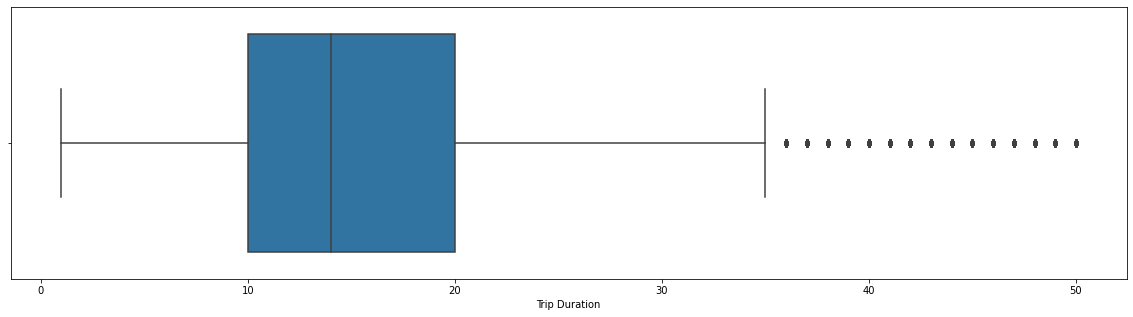

In [192]:
plt.figure(figsize = (20,5))
sns.boxplot(travel_df['Trip Duration'])
plt.show()

Interesting find:\
Some trip durations are over 130 minutes which are clear outliers and should be removed.\
Observations:\

* Major trip durations took between 10-20 mins to complete.
* Mean and mode are not same which shows that trip duration distribution is skewed towards right.\
Let's analyze more

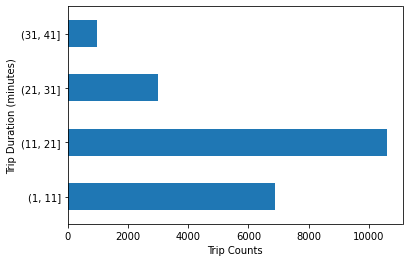

In [194]:
travel_df['Trip Duration'].groupby(pd.cut(travel_df['Trip Duration'], np.arange(1,50,10))).count().plot(kind='barh')
plt.xlabel('Trip Counts')
plt.ylabel('Trip Duration (minutes)')
plt.show()

We can observe that most of the Matam-Hadar  trips took 10 - 20 mins to complete . Let's move ahead to next feature.

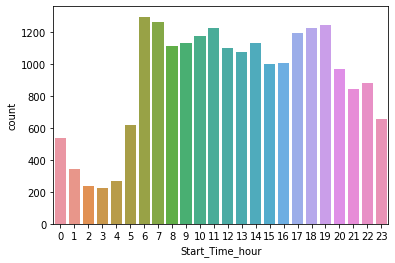

In [195]:
#total trip per hour
sns.countplot(travel_df['Start_Time_hour'])
plt.show()


Observation:\
we can ser that the intensive travels begins at 6-8am.then it's back at 10-11am.then it's back from 17 to 19. There is  unusual behavior here.In the morning the parents drive their kids to school and then they go to work.In the evening the employees go back home.

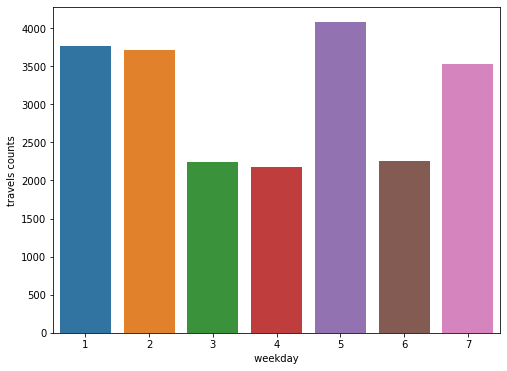

In [196]:
#Total trips per weekday
plt.figure(figsize = (8,6))
sns.countplot(travel_df['start day'])
plt.xlabel(' weekday ')
plt.ylabel('travels counts')
plt.show()

Observation:\
Here we can see an increasing trend of trips at Thursday. The trend starts clining from saturday till monday which is normal where some office going people likes to travel at Satrurday and they go back to work at Sunday and Monday.\
Let's drill down more to see the hourwise pickup pattern across the week

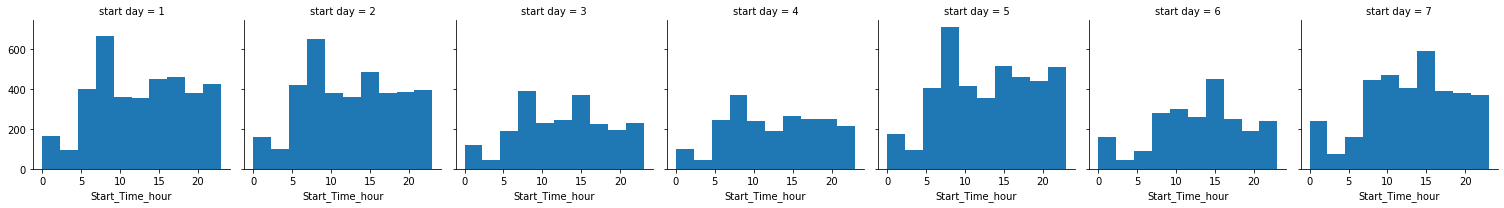

In [197]:
n = sns.FacetGrid(travel_df, col='start day')
n.map(plt.hist, 'Start_Time_hour')
plt.show()

Interesting find:\
* Travels dicreased in the late night hours over the week.
* In Tuseday and Wednesday there is no much trips all over the day instead of the rest weekdays.
* the most intensive hour is 7-8am, because all the kids go to school and the employees go to work.

## **Bivariate Analysis**

In [ ]:
#Bivariate Analysis


In [ ]:
#Trip Duration per hour

**Trip Duration per hour:**\
We need to aggregate the total trip duration to plot it agaist the day hours. The aggregation measure can be anything like sum, mean, median or mode for the duration. Since we already did the outlier analysis, so we can take the mean to visualize the pattern which should not result in the bias of the general trend.

Lets take a look

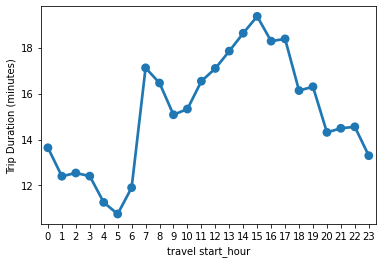

In [198]:
group1 = travel_df.groupby('Start_Time_hour')['Trip Duration'].mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (minutes)')
plt.xlabel('travel start_hour')
plt.show()


Observations:\
* Average trip duration is lowest at 4:00am to 5:00am when there is minimal traffic on the roads.
* Average trip duration is generally highest around 16:00 PM during the busy streets.
* Trip duration on an average is similar during early morning hours i.e. from 1:00am to 3:00am.

Trip duration per weekday\
Let's now analyze the pattern of trip duration during the week.

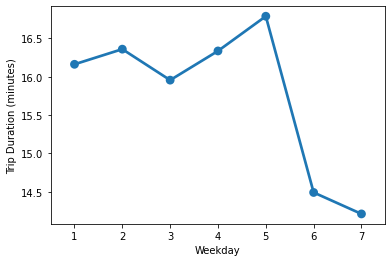

In [199]:
#Trip duration per weekday:
group1 = travel_df.groupby('start day')['Trip Duration'].mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (minutes)')
plt.xlabel('Weekday')
plt.show()

We can see that trip duration is almost equally distributed across Sunday,Monday,Tuesday,Wednesday on a scale of 16.5-18 minutes with minimal difference in the duration times. Also, it is observed that trip duration on thursday is longest among all days.

Trip duration per start minute\
Let's now analyze the pattern of trip duration during the start time(in minutes).

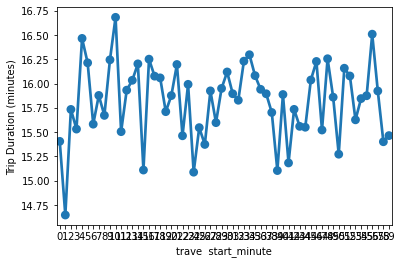

In [200]:
#Trip duration per start minute
group1 = travel_df.groupby('Start_Time_minutes')['Trip Duration'].mean()
sns.pointplot(group1.index, group1.values)
plt.ylabel('Trip Duration (minutes)')
plt.xlabel('trave  start_minute')
plt.show()

## ***Feature Engineering***

After looking at the dataset from different perspectives. Let's prepare our dataset before training our model. Since our dataset do not contain very large number of dimensions. We will first try to use feature selection instead of the feature extraction technique.

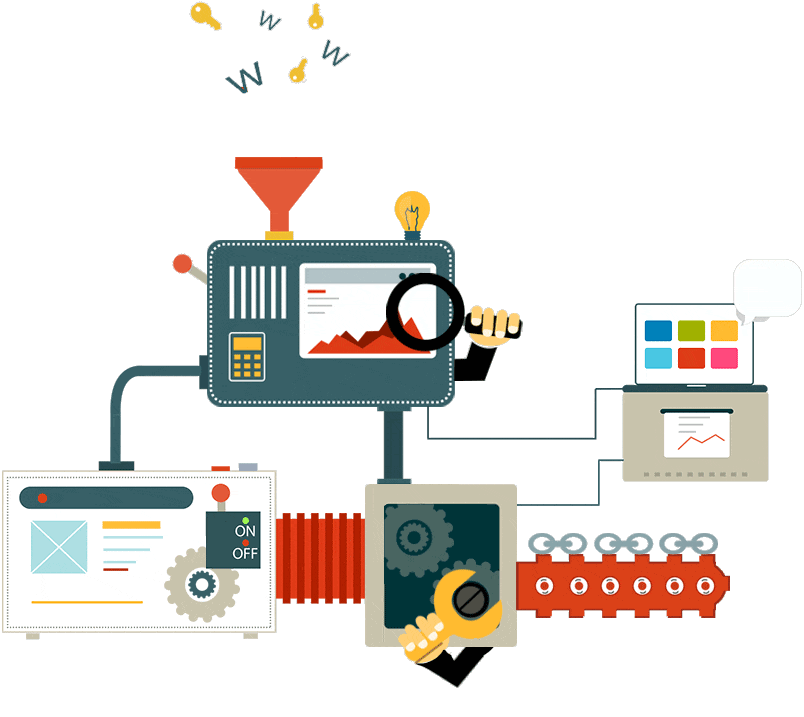

## **Feature Selection**

Intuition\
* We will use backward elimination technique to select the best features to train our model.\
* It displays some statistical metrics with there significance value.\
* Like, It shows the p values for each feature as per its significance in the whole dataset.\
* It also shows the adjusted R squared values to identify whether removing or selecting the feature is beneficial or not.\
* For now we will only look at the P and adjusted R squared value to decide which features to keep and which needed to be removed.\
Let's assign the values to X & Y array from the dataset.

In [201]:

travel_df = pd.get_dummies(travel_df, columns=['start day','end day','Start_Time_hour','End_Time_hour','Start_Time_minutes','End_Time_minutes'])
travel_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,...,End_Time_minutes_50,End_Time_minutes_51,End_Time_minutes_52,End_Time_minutes_53,End_Time_minutes_54,End_Time_minutes_55,End_Time_minutes_56,End_Time_minutes_57,End_Time_minutes_58,End_Time_minutes_59
448,100085,bt101,bt108,2021-11-29 20:42:00,2021-11-29 20:56:00,Matam,Hadar,2021-11-29,20:42:00,2021-11-29,...,0,0,0,0,0,0,1,0,0,0
461,100087,bt103,bt108,2021-11-29 05:43:00,2021-11-29 05:49:00,Matam,Hadar,2021-11-29,05:43:00,2021-11-29,...,0,0,0,0,0,0,0,0,0,0
550,100118,bt102,bt108,2021-11-15 11:48:00,2021-11-15 12:01:00,Matam,Hadar,2021-11-15,11:48:00,2021-11-15,...,0,0,0,0,0,0,0,0,0,0
1342,100310,bt100,bt108,2021-11-22 11:10:00,2021-11-22 11:31:00,Matam,Hadar,2021-11-22,11:10:00,2021-11-22,...,0,0,0,0,0,0,0,0,0,0
1365,100317,bt101,bt108,2021-10-11 12:15:00,2021-10-11 12:32:00,Matam,Hadar,2021-10-11,12:15:00,2021-10-11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038818,99715,bt102,bt108,2021-11-24 08:48:00,2021-11-24 09:00:00,Matam,Hadar,2021-11-24,08:48:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,0
3038924,99772,bt100,bt149,2021-08-11 21:29:00,2021-08-11 21:48:00,Matam,Hadar,2021-08-11,21:29:00,2021-08-11,...,0,0,0,0,0,0,0,0,0,0
3039159,99859,bt100,bt108,2021-11-24 23:27:00,2021-11-24 23:41:00,Matam,Hadar,2021-11-24,23:27:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,0
3039303,99936,bt101,bt108,2021-11-24 01:28:00,2021-11-24 01:37:00,Matam,Hadar,2021-11-24,01:28:00,2021-11-24,...,0,0,0,0,0,0,0,0,0,0


In [203]:
#First chech the index of the features and label
list(zip( range(0,len(travel_df.columns)),travel_df.columns))

[(0, 'mac'),
 (1, 'src'),
 (2, 'dest'),
 (3, 'start_time'),
 (4, 'end_time'),
 (5, 'from'),
 (6, 'to'),
 (7, 'Start_Time_Dates'),
 (8, 'Start_Time_Times'),
 (9, 'End_Time_Dates'),
 (10, 'End_Time_Times'),
 (11, 'Trip Duration'),
 (12, 'Day_of_Start'),
 (13, 'Day_of_End'),
 (14, 'start day_1'),
 (15, 'start day_2'),
 (16, 'start day_3'),
 (17, 'start day_4'),
 (18, 'start day_5'),
 (19, 'start day_6'),
 (20, 'start day_7'),
 (21, 'end day_1'),
 (22, 'end day_2'),
 (23, 'end day_3'),
 (24, 'end day_4'),
 (25, 'end day_5'),
 (26, 'end day_6'),
 (27, 'end day_7'),
 (28, 'Start_Time_hour_0'),
 (29, 'Start_Time_hour_1'),
 (30, 'Start_Time_hour_2'),
 (31, 'Start_Time_hour_3'),
 (32, 'Start_Time_hour_4'),
 (33, 'Start_Time_hour_5'),
 (34, 'Start_Time_hour_6'),
 (35, 'Start_Time_hour_7'),
 (36, 'Start_Time_hour_8'),
 (37, 'Start_Time_hour_9'),
 (38, 'Start_Time_hour_10'),
 (39, 'Start_Time_hour_11'),
 (40, 'Start_Time_hour_12'),
 (41, 'Start_Time_hour_13'),
 (42, 'Start_Time_hour_14'),
 (43, 'S

In [204]:
Y = travel_df.iloc[:,11].values
X = travel_df.iloc[:,range(14,195)].values

In [205]:
print("Let's append {} rows of 1's as the first column in the X array".format(X.shape[0]))

Let's append 21761 rows of 1's as the first column in the X array


In [206]:
X1 = np.append(arr = np.ones((X.shape[0],1)).astype(int), values = X, axis = 1)
X1.shape

(21761, 182)

In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as sm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import warnings; warnings.simplefilter('ignore')

In [208]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [209]:
#Select all the features in X array

X_opt = X1[:,range(0,181)]
regressor_OLS = sm.OLS(Y,X_opt).fit()

#Fetch p values for each feature
p_Vals = regressor_OLS.pvalues

#define significance level for accepting the feature.
sig_Level = 0.05

#Loop to iterate over features and remove the feature with p value less than the sig_level
while max(p_Vals) > sig_Level:
    print("Probability values of each feature \n")
    print(p_Vals)
    X_opt = np.delete(X_opt, np.argmax(p_Vals), axis = 1)
    print("\n")
    print("Feature at index {} is removed \n".format(str(np.argmax(p_Vals))))
    print(str(X_opt.shape[1]-1) + " dimensions remaining now... \n")
    regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
    p_Vals = regressor_OLS.pvalues
    print("=================================================================\n")
    
#Print final summary
print("Final stat summary with optimal {} features".format(str(X_opt.shape[1]-1)))
regressor_OLS.summary()

Probability values of each feature 

[8.92335506e-01 5.85368685e-01 5.85368685e-01 5.85368685e-01
 5.85368685e-01 5.85368685e-01 5.85368685e-01 5.85368685e-01
 6.70451750e-01 6.70451750e-01 6.70451750e-01 6.70451750e-01
 6.70451750e-01 6.70451750e-01 6.70451750e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.19628095e-01
 8.19628095e-01 8.19628095e-01 8.19628095e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.50257633e-01
 8.50257633e-01 8.50257633e-01 8.50257633e-01 8.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     37.69
Date:                Sun, 17 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:18:57   Log-Likelihood:                -75424.
No. Observations:               21761   AIC:                         1.510e+05
Df Residuals:                   21662   BIC:                         1.518e+05
Df Model:                          98                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             7.3448      2.020      3.636      0.000       3.386      11.304
x2             4.1883      1.715      2.442      0.015       0.827       7.550
x3           -55.2914      2.046    -27.023      0.000     -59.302     -51.281
x4           -55.0174      2.046    -26.887      0.000     -59.028     -51.007
x5           -55.6016      2.046    -27.181      0.000     -59.611     -51.592
x6           -62.5344      2.942    -21.254      0.000     -68.301     -56.767
x7           -58.9448      2.715    -21.707      0.000     -64.267     -53.622
x8           -57.3540      2.044    -28.059      0.000     -61.361     -53.347
x9           -57.4625      2.042    -28.135      0.000     -61.466     -53.459
x10            6.7517      0.921      7.333      0.000       4.947       8.556
x11           10.6373      1.256      8.471      0.000       8.176      13.099
x12           21.6525      1.583     13.674      0.000      18.549      24.756
x13           39.8223      1.874     21.249      0.000      36.149      43.495
x14           53.7755      2.025     26.555      0.000      49.806      57.745
x15           64.9161      2.078     31.239      0.000      60.843      68.989
x16           67.1818      2.049     32.790      0.000      63.166      71.198
x17           67.7510      1.995     33.965      0.000      63.841      71.661
x18           61.4205      1.941     31.651      0.000      57.617      65.224
x19           56.7791      1.885     30.125      0.000      53.085      60.473
x20           53.3511      1.826     29.210      0.000      49.771      56.931
x21           49.5901      1.767     28.070      0.000      46.127      53.053
x22           45.6326      1.704     26.786      0.000      42.293      48.972
x23           42.0262      1.635     25.704      0.000      38.821      45.231
x24           37.6183      1.565     24.033      0.000      34.550      40.686
x25           33.3304      1.493     22.322      0.000      30.404      36.257
x26           25.7041      1.414     18.183      0.000      22.933      28.475
x27           20.3690      1.335     15.253      0.000      17.751      22.987
x28           14.5778      1.255     11.615      0.000      12.118      17.038
x29           11.8039      1.156     10.214      0.000       9.539      14.069
x30            6.6462      1.050      6.330      0.000       4.588       8.704
x31            4.7055      0.857      5.489      0.000       3.025       6.386
x32            2.6114      0.632      4.129      0.000       1.372       3.851
x33           63.9521      2.054     31.139      0.000      59.927      67.978
x34           59.7527      2.042     29.267      0.000      55.751      63.755
x35           50.5920      1.951     25.930      0.000      46.768      54.416
x36           32.0678      1.709     18.768      0.000      28.719      35.417
x3

In [210]:
#Split raw data
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=4, test_size=0.2)

#Split data from the feature selection group
X_train_fs, X_test_fs, y_train_fs, y_test_fs = train_test_split(X_opt,Y, random_state=4, test_size=0.2)

## **Feature Extraction**

We will use PCA for feature extraction i.e. Principal Component Analysis. It is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components

Split Data\
Lets split our data first before scaling the features

In [211]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X,Y, random_state=4, test_size=0.2)

Scale Data\
It is suggested to scale the input varibles first before applying PCA to standardise the variance and avoid the bias. Lets Scale the data using StandardScaler.

In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

PCA application\
Let's apply PCA technique on the training features to understand how many principal components should we select for our model to capture atleast 90% variance. For that we will take help of plot and cumsum function of numpy package.

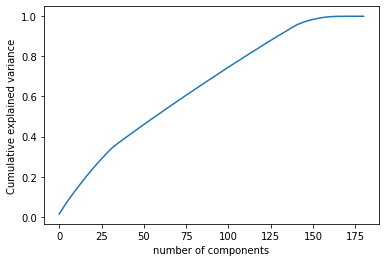

In [213]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("Cumulative explained variance")
plt.show()

In [214]:
arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
list(zip(range(1,len(arr)), arr))

[(1, 1.44),
 (2, 2.8),
 (3, 4.15),
 (4, 5.430000000000001),
 (5, 6.69),
 (6, 7.94),
 (7, 9.11),
 (8, 10.26),
 (9, 11.4),
 (10, 12.540000000000001),
 (11, 13.670000000000002),
 (12, 14.780000000000001),
 (13, 15.89),
 (14, 16.97),
 (15, 18.049999999999997),
 (16, 19.099999999999998),
 (17, 20.15),
 (18, 21.169999999999998),
 (19, 22.189999999999998),
 (20, 23.2),
 (21, 24.189999999999998),
 (22, 25.169999999999998),
 (23, 26.139999999999997),
 (24, 27.089999999999996),
 (25, 28.019999999999996),
 (26, 28.939999999999998),
 (27, 29.849999999999998),
 (28, 30.749999999999996),
 (29, 31.639999999999997),
 (30, 32.51),
 (31, 33.339999999999996),
 (32, 34.12),
 (33, 34.89),
 (34, 35.57),
 (35, 36.24),
 (36, 36.870000000000005),
 (37, 37.49),
 (38, 38.11),
 (39, 38.73),
 (40, 39.349999999999994),
 (41, 39.959999999999994),
 (42, 40.56999999999999),
 (43, 41.17999999999999),
 (44, 41.78999999999999),
 (45, 42.39999999999999),
 (46, 43.00999999999999),
 (47, 43.61999999999999),
 (48, 44.2199999

Observation:\
Here we can see that almost 40 variables are needed for capturing atleast 99% of the variance in the training dataset. Hence we will use the same set of variables.

In [215]:
pca_10 = PCA(n_components=40)
X_train_pca = pca_10.fit_transform(X_train_pca)
X_test_pca = pca_10.transform(X_test_pca)

## **Correlation Analysis**

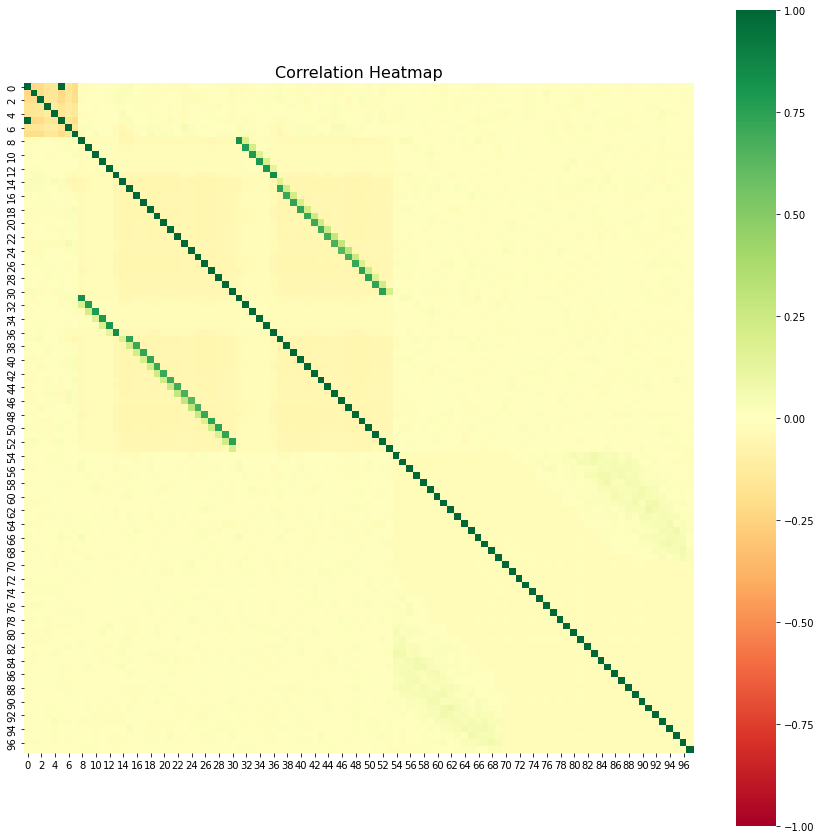

In [216]:
#heatmap for features selections correlations
plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train_fs[:,1:]).corr()
corr.index = pd.DataFrame(X_train_fs[:,1:]).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

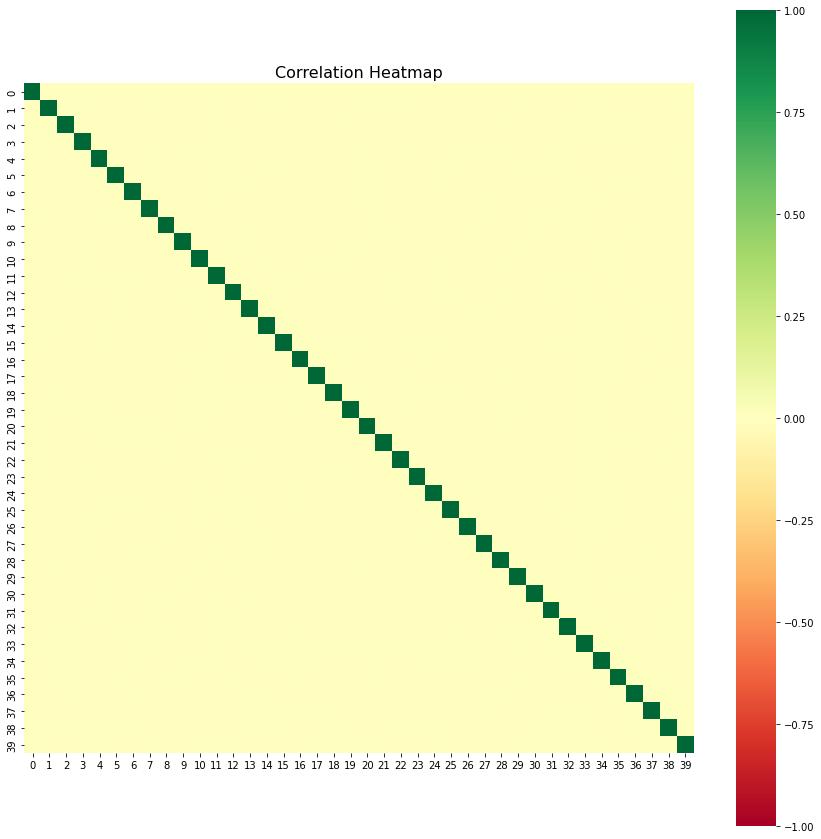

In [217]:
#heatmap for Feature extraction correlations
plt.figure(figsize=(15,15))
corr = pd.DataFrame(X_train_pca).corr()
corr.index = pd.DataFrame(X_train_pca).columns
sns.heatmap(corr, cmap='RdYlGn', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

Model\
We need a model to train on our dataset to serve our purpose of prediciting the trip duration given the other features as training and test set. Since our dependent variable contains continous values so we will use regression technique to predict our output.

## **Multiple Linear Regression**

In [218]:
#training the model
#Linear regressor for the raw data
regressor = LinearRegression() 
regressor.fit(X_train,y_train) 

#Linear regressor for the Feature selection group
regressor1 = LinearRegression() 
regressor1.fit(X_train_fs,y_train_fs) 

#Linear regressor for the Feature extraction group
regressor2 = LinearRegression() 
regressor2.fit(X_train_pca,y_train_pca) 
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

LinearRegression(normalize=False)

In [219]:
#Model prediction
#Predict from the test features of raw data
y_pred = regressor.predict(X_test) 

#Predict from the test features of Feature Selection group
y_pred = regressor1.predict(X_test_fs) 

#Predict from the test features of Feature Extraction group
y_pred_pca = regressor2.predict(X_test_pca)

In [220]:
#Model evaluation
#Evaluate the regressor on the raw data
print('RMSE score for the Multiple LR raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print('Variance score for the Multiple LR raw is : %.2f' % regressor.score(X_test, y_test))
print("\n")

#Evaluate the regressor on the Feature selection group
print('RMSE score for the Multiple LR FS is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred))))
print('Variance score for the Multiple LR FS is : %.2f' % regressor1.score(X_test_fs, y_test_fs))
print("\n")

#Evaluate the regressor on the Feature extraction group
print('RMSE score for the Multiple LR PCA is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca,y_pred_pca))))
print('Variance score for the Multiple LR PCA is : %.2f' % regressor2.score(X_test_pca, y_test_pca))

RMSE score for the Multiple LR raw is : 7.837086956603799
Variance score for the Multiple LR raw is : 0.13


RMSE score for the Multiple LR FS is : 7.837086956603799
Variance score for the Multiple LR FS is : 0.13


RMSE score for the Multiple LR PCA is : 8.052371286756063
Variance score for the Multiple LR PCA is : 0.08


Observations\
* Very poor Root mean squared value.
* And the low variance score which is also bad.
* Both the models i.e. from the feature selection and the feature extraction group resulted quite bad in prediction.

Let's find out the reason of this behaviour:-

In [221]:
X_train.shape

(17408, 181)

In [222]:
#Find linear correlation of each feature with the target variable
from scipy.stats import pearsonr
df1 = pd.DataFrame(np.concatenate((X_train,y_train.reshape(len(y_train),1)),axis=1))
df1.columns = df1.columns.astype(str)

features = df1.iloc[:,:181].columns.tolist()
target = df1.iloc[:,181].name

correlations = {}
for f in features:
    data_temp = df1[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]
    
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
44 vs 181,-0.135613
20 vs 181,-0.119279
19 vs 181,-0.106866
43 vs 181,-0.106763
29 vs 181,0.095324
...,...
116 vs 181,-0.000374
75 vs 181,0.000328
178 vs 181,0.000166
124 vs 181,-0.000146


Observations\
We can see that none of the feature is linearly correlated with the target variable "181". That is why it is not a good model for the prediction of the trip duration. So let's move ahead and try the random forest regressor. We are not using decision tree regressor because the random forest will anyways consist of almost all its properties. Also, we will not use SVR because it takes too much time to train on this huge dataset even with the default settings. It seems to be not good with high dimensional dataset as well as for the huge instances

## **Random Forest Regressor**

In [223]:
#Model training
#instantiate the object for the Random Forest Regressor with default params from raw data
regressor_rfraw = RandomForestRegressor(n_jobs=-1)

#instantiate the object for the Random Forest Regressor with default params for Feature Selection Group
regressor_rf = RandomForestRegressor(n_jobs=-1)

# #instantiate the object for the Random Forest Regressor with tuned hyper parameters for Feature Selection Group
# regressor_rf1 = RandomForestRegressor(n_estimators = 26,
#                                      max_depth = 22,
#                                      min_samples_split = 9,
#                                      n_jobs=-1)

#instantiate the object for the Random Forest Regressor for Feature Extraction Group
regressor_rf2 = RandomForestRegressor(n_jobs=-1)


#Train the object with default params for raw data
regressor_rfraw.fit(X_train,y_train)

#Train the object with default params for Feature Selection Group
regressor_rf.fit(X_train_fs,y_train_fs)

# #Train the object with tuned params for Feature Selection Group
# regressor_rf1.fit(X_train_fs,y_train_fs)

# #Train the object with default params for Feature Extraction Group
regressor_rf2.fit(X_train_pca,y_train_pca)

print("\n")

In [224]:
#Model prediction
#Predict the output with object of default params for Feature Selection Group
y_pred_rfraw = regressor_rfraw.predict(X_test)

#Predict the output with object of default params for Feature Selection Group
y_pred_rf = regressor_rf.predict(X_test_fs)

# #Predict the output with object of hyper tuned params for Feature Selection Group
# y_pred_rf1 = regressor_rf1.predict(X_test_fs)

#Predict the output with object of PCA params for Feature Extraction Group
y_pred_rfpca = regressor_rf2.predict(X_test_pca)

print("\n")

In [225]:
#Model evaluation
#Evaluate the model with default params for raw data
print('RMSE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_rfraw))))
print('RMSLE score for the RF regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_rfraw))))
print('Variance score for the RF regressor raw is : %.2f' % regressor_rfraw.score(X_test, y_test))

print("\n")

#Evaluate the model with default params for Feature Selection Group
print('RMSE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_rf))))
print('RMSLE score for the RF regressor is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_fs,y_pred_rf))))
print('Variance score for the RF regressor is : %.2f' % regressor_rf.score(X_test_fs, y_test_fs))

# print("\n")

# #Evaluate the model with tuned params for Feature Selection Group
# print('RMSE score for the RF regressor1 is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_rf1))))
# print('RMSLE score for the RF regressor1 is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_fs,y_pred_rf1))))
# print('Variance score for the RF regressor1 is : %.2f' % regressor_rf1.score(X_test_fs, y_test_fs))

print("\n")

#Evaluate the model with PCA params  for Feature Extraction Group
print('RMSE score for the RF regressor2 is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_rfpca))))
print('Variance score for the RF regressor2 is : %.2f' % regressor_rf2.score(X_test_pca, y_test_pca))

RMSE score for the RF regressor raw is : 6.803255121154154
RMSLE score for the RF regressor raw is : 0.4325505213732894
Variance score for the RF regressor raw is : 0.35


RMSE score for the RF regressor is : 7.444536353380638
RMSLE score for the RF regressor is : 0.4726325446368889
Variance score for the RF regressor is : 0.22


RMSE score for the RF regressor2 is : 6.317057089244972
Variance score for the RF regressor2 is : 0.44


Interesting find\
There is a clear improvement on the RMSE score for the Random forest regressor over the Linear regressor of the feature selection group.
Even the variance score is 0.5 which is a not good score.
RMSE score for the RF regressor of feature extraction group is still very bad along with the variance score.
RMSE score for the feature selection group is less same as the raw data score. Sometimes the RMSE score for the raw data is better and vice versa. It fluctuates on every iteration and this is quite weird!\
Let's see if we can improve this further with the most sought after algorigthm i.e. XGBoost!!

## **XGBoost Regressor**

In [226]:
#Model training
#instantiate the object for the XGBoost Regressor with default params for raw data
regressor_xgbraw = XGBRegressor(n_jobs=-1)

#instantiate the object for the XGBoost Regressor with default params for Feature Selection Group
regressor_xgb = XGBRegressor(n_jobs=-1)

#instantiate the object for the XGBoost Regressor with tuned hyper parameters for Feature Selection Group
regressor_xgb1 = XGBRegressor(n_estimators=300,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1,
                           n_jobs=-1)

#instantiate the object for the XGBoost Regressor for Feature Extraction Group
regressor_xgb2 = XGBRegressor(n_jobs=-1)


#Train the object with default params for raw data
regressor_xgbraw.fit(X_train,y_train)

#Train the object with default params for Feature Selection Group
regressor_xgb.fit(X_train_fs,y_train_fs)

#Train the object with tuned params for Feature Selection Group
regressor_xgb1.fit(X_train_fs,y_train_fs)

#Train the object with default params for Feature Extraction Group
regressor_xgb2.fit(X_train_pca,y_train_pca)

print("\n")

[17:21:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.




In [227]:
#Model prediction
#Predict the output with object of default params for raw data
y_pred_xgbraw = regressor_xgbraw.predict(X_test)

#Predict the output with object of default params for Feature Selection Group
y_pred_xgb = regressor_xgb.predict(X_test_fs)

#Predict the output with object of hyper tuned params for Feature Selection Group
y_pred_xgb1 = regressor_xgb1.predict(X_test_fs)

#Predict the output with object of PCA params for Feature Extraction Group
y_pred_xgb_pca = regressor_xgb2.predict(X_test_pca)

print("\n")

In [228]:
#Model Evaluation
#Evaluate the model with default params for raw data
print('RMSE score for the XGBoost regressor raw is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgbraw))))
# print('RMSLE score for the XGBoost regressor is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_xgb))))
print('Variance score for the XGBoost regressor raw is : %.2f' % regressor_xgbraw.score(X_test, y_test))

print("\n")

#Evaluate the model with default params for Feature Selection Group
print('RMSE score for default params of Feature Selection Group for the XGBoost regressor is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_xgb))))
# print('RMSLE score for the XGBoost regressor is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_xgb))))
print('Variance score for default params of Feature Selection Group for the XGBoost regressor is : %.2f' % regressor_xgb.score(X_test_fs, y_test_fs))

print("\n")

#Evaluate the model with Tuned params for Feature Selection Group
print('RMSE score for Tuned params of Feature Selection Group for the XGBoost regressor1 is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_fs,y_pred_xgb1))))
# print('RMSLE score for the XGBoost regressor1 is : {}'.format(np.sqrt(metrics.mean_squared_log_error(y_test_fs,y_pred_xgb1))))
print('Variance score for Tuned params of Feature Selection Group for the XGBoost regressor1 is : %.2f' % regressor_xgb1.score(X_test_fs,y_test_fs))

print("\n")

#Evaluate the model with PCA params  for Feature Extraction Group
print('RMSE score for PCA params of Feature Extraction Group for the XGBoost regressor2 is : {}'.format(np.sqrt(metrics.mean_squared_error(y_test_pca, y_pred_xgb_pca))))
print('Variance score for PCA params of Feature Extraction Group for the XGBoost regressor2 is : %.2f' % regressor_xgb2.score(X_test_pca, y_test_pca))

RMSE score for the XGBoost regressor raw is : 7.752669430808408
Variance score for the XGBoost regressor raw is : 0.15


RMSE score for default params of Feature Selection Group for the XGBoost regressor is : 7.747044076643652
Variance score for default params of Feature Selection Group for the XGBoost regressor is : 0.15


RMSE score for Tuned params of Feature Selection Group for the XGBoost regressor1 is : 6.9884150522462
Variance score for Tuned params of Feature Selection Group for the XGBoost regressor1 is : 0.31


RMSE score for PCA params of Feature Extraction Group for the XGBoost regressor2 is : 7.272998587274343
Variance score for PCA params of Feature Extraction Group for the XGBoost regressor2 is : 0.25


Observations\
* There is a significant improvement in the RMSE score for the tuned XGBoost regressor over Random forest regressor when trained on the feature selection group.
* But the performance of the default XGBoost regressor is quite worse than the default RF regressor on the same data.
* Also, the RMSE score on the raw data and feature extracted data are approxematly same.
* Not to mention the fact that RMSE score for the XGBoost regressor of the feature extraction group and the XGBoost regressor of the default params for raw data is still bad along with the variance score.

In [229]:
#Comparing test results for the XGBoost and RF regressor
print("Total sum of difference between the actual and the predicted values for the RF regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_rf))))
print("Total sum of difference between the actual and the predicted values for the tuned XGB regressor is : %d"%np.abs(np.sum(np.subtract(y_test,y_pred_xgb1))))

Total sum of difference between the actual and the predicted values for the RF regressor is : 2233
Total sum of difference between the actual and the predicted values for the tuned XGB regressor is : 286


Learning curves

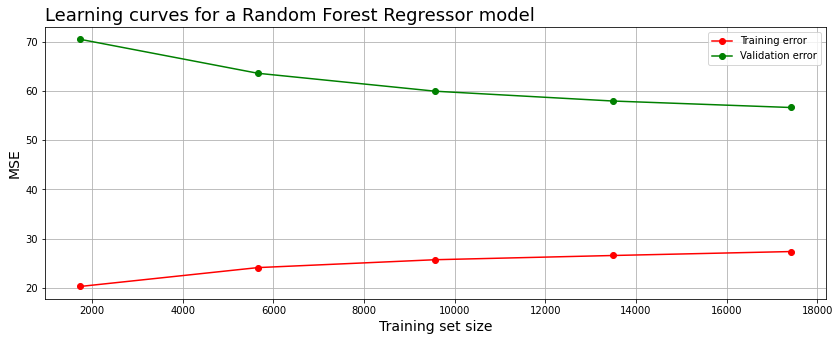

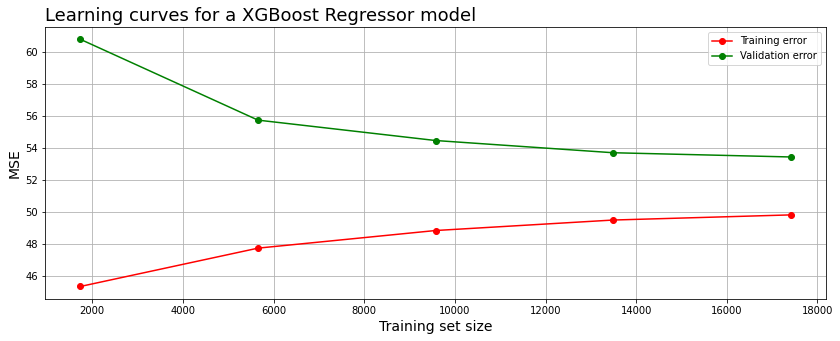

In [230]:
#Define a function to plot learning curve.
def learning_curves(estimator, title, features, target, train_sizes, cv, n_jobs=-1):
    plt.figure(figsize = (14,5))
    train_sizes, train_scores, validation_scores = learning_curve(estimator, features, target, train_sizes = train_sizes, cv = cv, scoring = 'neg_mean_squared_error',  n_jobs=n_jobs)
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    
    plt.grid()
    
    plt.plot(train_sizes, train_scores_mean,'o-', color="r", label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean,'o-', color="g", label = 'Validation error')

    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    
    title = 'Learning curves for a ' + title + ' model'
    plt.title(title, fontsize = 18, loc='left')
    
    plt.legend(loc="best")
    
    return plt

# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=4)

# Plot learning curve for the RF Regressor
title = "Random Forest Regressor"

# Call learning curve with all dataset i.e. traininig and test combined because CV will take of data split.
learning_curves(regressor_rf, title, X_opt,Y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)

#Plot learning curve for the XGBoost Regressor
title = "XGBoost Regressor"

# Call learning curve on less number of estimators than the tuned estimator because it took too much time for the compilation.
learning_curves(XGBRegressor(n_estimators=111,
                            learning_rate=0.08,
                            gamma=0,
                            subsample=0.75,
                            colsample_bytree=1,
                            max_depth=7,
                            min_child_weight=4,
                            silent=1), title, X_opt,Y, train_sizes=np.linspace(.1, 1.0, 5), cv=cv, n_jobs=-1)

plt.show()

## **Neural Networks**

Now we will use Neural Networks to predict the trip duration.
We will start our analysis from the beginning:

In [287]:
travel_df = final_df.loc[((final_df['from'] == 'Matam') & (final_df['to'] == 'Hadar')&(final_df['Trip Duration']<=50)&(final_df['Trip Duration']>=0))]
travel_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,start day,end day
448,100085,bt101,bt108,2021-11-29 20:42:00,2021-11-29 20:56:00,Matam,Hadar,2021-11-29,20:42:00,2021-11-29,20:56:00,14.0,20,20,56,42,Monday,Monday,2,2
461,100087,bt103,bt108,2021-11-29 05:43:00,2021-11-29 05:49:00,Matam,Hadar,2021-11-29,05:43:00,2021-11-29,05:49:00,6.0,5,5,49,43,Monday,Monday,2,2
550,100118,bt102,bt108,2021-11-15 11:48:00,2021-11-15 12:01:00,Matam,Hadar,2021-11-15,11:48:00,2021-11-15,12:01:00,13.0,12,11,1,48,Monday,Monday,2,2
1342,100310,bt100,bt108,2021-11-22 11:10:00,2021-11-22 11:31:00,Matam,Hadar,2021-11-22,11:10:00,2021-11-22,11:31:00,21.0,11,11,31,10,Monday,Monday,2,2
1365,100317,bt101,bt108,2021-10-11 12:15:00,2021-10-11 12:32:00,Matam,Hadar,2021-10-11,12:15:00,2021-10-11,12:32:00,17.0,12,12,32,15,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038818,99715,bt102,bt108,2021-11-24 08:48:00,2021-11-24 09:00:00,Matam,Hadar,2021-11-24,08:48:00,2021-11-24,09:00:00,12.0,9,8,0,48,Wednesday,Wednesday,4,4
3038924,99772,bt100,bt149,2021-08-11 21:29:00,2021-08-11 21:48:00,Matam,Hadar,2021-08-11,21:29:00,2021-08-11,21:48:00,19.0,21,21,48,29,Wednesday,Wednesday,4,4
3039159,99859,bt100,bt108,2021-11-24 23:27:00,2021-11-24 23:41:00,Matam,Hadar,2021-11-24,23:27:00,2021-11-24,23:41:00,14.0,23,23,41,27,Wednesday,Wednesday,4,4
3039303,99936,bt101,bt108,2021-11-24 01:28:00,2021-11-24 01:37:00,Matam,Hadar,2021-11-24,01:28:00,2021-11-24,01:37:00,9.0,1,1,37,28,Wednesday,Wednesday,4,4


In [288]:
travel_df.describe()

,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,start day,end day
count,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000,21761.000000
mean,15.819585,12.955379,12.792611,29.829144,29.201875,3.919581,3.919811
std,8.379953,5.991729,5.952196,17.217087,17.198495,2.097347,2.097476
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,10.000000,8.000000,8.000000,15.000000,14.000000,2.000000,2.000000
50%,14.000000,13.000000,13.000000,30.000000,29.000000,4.000000,4.000000
75%,20.000000,18.000000,18.000000,45.000000,44.000000,6.000000,6.000000
max,50.000000,23.000000,23.000000,59.000000,59.000000,7.000000,7.000000


In [289]:
# Let's see the correlation clearly
(travel_df.corr()["Trip Duration"] # transform it into data corr
      .sort_values(ascending=False) # sort the values
      .to_frame() # change it into data frame
      .T) # transpose

,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,start day,end day
Trip Duration,1.0,0.10877,0.087616,0.00253,0.000224,-0.071371,-0.071467


In [290]:
# checking and visualizing the type of distribution of a feature column
def univariate_analysis(data, color, title1, title2):
    
    """
    Showing visualization of univariate
    analysis with displot and qqplot
    visualization from seaborn and statsmodel
    library.
    
    Parameters
    ----------
    data : DataFrame, array, or list of arrays, optional
        Dataset for plotting. If ``x`` and ``y`` are absent, this is
        interpreted as wide-form. Otherwise it is expected to be long-form. 
    title1: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
    title2: The title of the visualization, title1 for displot visualization
        And title2 for quantile plot from statsmodel.
        
    Returns
    -------
    fig : matplotlib figure
        Returns the Figure object with the plot drawn onto it.
    """
    
    fig, (ax1, ax2) = plt.subplots( # subplots
        ncols=2, # num of cols
        nrows=1, # num of rows
        figsize=(20, 6) # set the width and high
    )

    sns.distplot( # create a distplot visualization
        data, # data
        ax=ax1, # axes 1
        kde=True, # kde
        color=color # color
    )
    
    ax1.set_title( # set the title 1
        title1, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    qqplot( # qqplot (quantile plot)
        data, # data
        ax=ax2, # axes 2
        line='s' # line 
    )
    
    ax2.set_title( # set the title 2
        title2, 
        weight="bold", # weight
        fontname="monospace", # font-name
        fontsize=25, # font-size
        pad=30 # padding
    )
    
    return fig # returning the figure

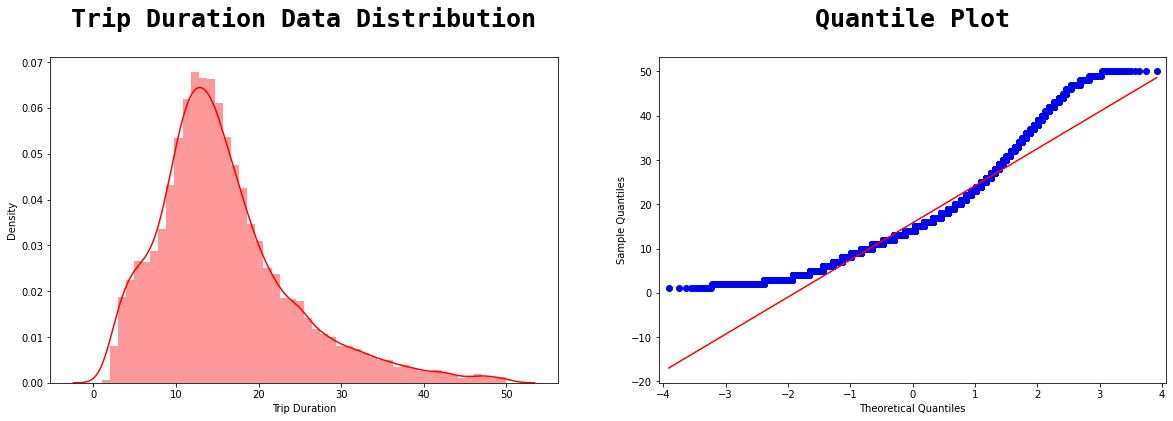

In [291]:
# Dependent Variables
univariate_analysis( # call the function
    data=travel_df["Trip Duration"], # put the data
    color="red", # pick the color
    title1="Trip Duration Data Distribution", # title1
    title2="Quantile Plot"); # title2

In [292]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = travel_df.skew().sort_values(ascending=False).to_frame().head()
skew_value

,0
Trip Duration,1.145069
start day,0.035929
end day,0.035782
mac,0.023123
Start_Time_minutes,0.015992


In [293]:
travel_df

,mac,src,dest,start_time,end_time,from,to,Start_Time_Dates,Start_Time_Times,End_Time_Dates,End_Time_Times,Trip Duration,End_Time_hour,Start_Time_hour,End_Time_minutes,Start_Time_minutes,Day_of_Start,Day_of_End,start day,end day
448,100085,bt101,bt108,2021-11-29 20:42:00,2021-11-29 20:56:00,Matam,Hadar,2021-11-29,20:42:00,2021-11-29,20:56:00,14.0,20,20,56,42,Monday,Monday,2,2
461,100087,bt103,bt108,2021-11-29 05:43:00,2021-11-29 05:49:00,Matam,Hadar,2021-11-29,05:43:00,2021-11-29,05:49:00,6.0,5,5,49,43,Monday,Monday,2,2
550,100118,bt102,bt108,2021-11-15 11:48:00,2021-11-15 12:01:00,Matam,Hadar,2021-11-15,11:48:00,2021-11-15,12:01:00,13.0,12,11,1,48,Monday,Monday,2,2
1342,100310,bt100,bt108,2021-11-22 11:10:00,2021-11-22 11:31:00,Matam,Hadar,2021-11-22,11:10:00,2021-11-22,11:31:00,21.0,11,11,31,10,Monday,Monday,2,2
1365,100317,bt101,bt108,2021-10-11 12:15:00,2021-10-11 12:32:00,Matam,Hadar,2021-10-11,12:15:00,2021-10-11,12:32:00,17.0,12,12,32,15,Monday,Monday,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3038818,99715,bt102,bt108,2021-11-24 08:48:00,2021-11-24 09:00:00,Matam,Hadar,2021-11-24,08:48:00,2021-11-24,09:00:00,12.0,9,8,0,48,Wednesday,Wednesday,4,4
3038924,99772,bt100,bt149,2021-08-11 21:29:00,2021-08-11 21:48:00,Matam,Hadar,2021-08-11,21:29:00,2021-08-11,21:48:00,19.0,21,21,48,29,Wednesday,Wednesday,4,4
3039159,99859,bt100,bt108,2021-11-24 23:27:00,2021-11-24 23:41:00,Matam,Hadar,2021-11-24,23:27:00,2021-11-24,23:41:00,14.0,23,23,41,27,Wednesday,Wednesday,4,4
3039303,99936,bt101,bt108,2021-11-24 01:28:00,2021-11-24 01:37:00,Matam,Hadar,2021-11-24,01:28:00,2021-11-24,01:37:00,9.0,1,1,37,28,Wednesday,Wednesday,4,4


In [307]:
import warnings
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [308]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

def preprocessing_data(data):
    """Returns Data that has been preprocessed"""
    # Prepare
    categorical_col = ['start day']
    numerical_col = [ 'End_Time_hour', 'Start_Time_hour', 
                     'End_Time_minutes', 'Start_Time_minutes']
    
    # Create a columns transformer
    column_transformer = make_column_transformer(
        # Create a columns transformer between 0 and 1
        (MinMaxScaler(), numerical_col),
        # Encoder all values in this columns between 0 and 1
        (OneHotEncoder(handle_unknown="ignore"), categorical_col)
    )
    
    # Create X & y (features and label)
    X = data.drop(columns=["Trip Duration"])
    y = data["Trip Duration"]
    
    # Build our train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Fit the columns transformer to our training data
    column_transformer.fit(X_train)
    
    # Transform training and test data with normalization (MinMaxScaler) and encoder (OneHotEncoder, LabelEncoder)
    X_train_normal = column_transformer.transform(X_train)
    X_test_normal = column_transformer.transform(X_test)
    
    # X_train and X_test (features)
    X_train, X_test = tf.constant(X_train_normal, dtype=tf.float32), tf.constant(X_test_normal, dtype=tf.float32)
    
    # y_train and y_test (label)
    y_train, y_test = tf.constant(y_train, dtype=tf.float32), tf.constant(y_test, dtype=tf.float32)
    
    return X_train, X_test, y_train, y_test

# Call the function
X_train, X_test, y_train, y_test = preprocessing_data(travel_df)

In [309]:
# Checking the shape and dimension of rows and columns (features)
X_train.shape, X_test.shape, X_train.ndim, X_test.ndim

(TensorShape([17408, 11]), TensorShape([4353, 11]), 2, 2)

In [310]:
# Checking the shape and dimension of rows and columns (label)
y_train.shape, y_test.shape, y_train.ndim, y_test.ndim

(TensorShape([17408]), TensorShape([4353]), 1, 1)

In [311]:
# Checking the type (features and label)
X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype

(tf.float32, tf.float32, tf.float32, tf.float32)

In [312]:
# Checking the len (feature and label)
len(X_train), len(X_test), len(y_train), len(y_test)

(17408, 4353, 17408, 4353)

### **Simple Neural Network Model**

In [148]:
#lets create a simple model:
# Create the model
small_model = tf.keras.Sequential([
    layers.Dense(100, activation="relu", input_shape=[11], name="layer_1"),
    layers.Dense(10, activation="relu", name="layer_2"),
    layers.Dense(1, name="output_layer")
], name="small_model")

# Compile the model
small_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit the model
small_model_history = small_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10
544/544 [==============================] - 2s 3ms/step - loss: 7.1832 - mae: 7.1832 - val_loss: 6.1101 - val_mae: 6.1101
Epoch 2/10
544/544 [==============================] - 1s 3ms/step - loss: 5.9388 - mae: 5.9388 - val_loss: 5.7579 - val_mae: 5.7579
Epoch 3/10
544/544 [==============================] - 1s 3ms/step - loss: 5.3407 - mae: 5.3407 - val_loss: 4.8445 - val_mae: 4.8445
Epoch 4/10
544/544 [==============================] - 1s 3ms/step - loss: 3.8151 - mae: 3.8151 - val_loss: 2.9025 - val_mae: 2.9025
Epoch 5/10
544/544 [==============================] - 1s 3ms/step - loss: 2.6276 - mae: 2.6276 - val_loss: 2.5538 - val_mae: 2.5538
Epoch 6/10
544/544 [==============================] - 1s 3ms/step - loss: 2.4485 - mae: 2.4485 - val_loss: 2.4452 - val_mae: 2.4452
Epoch 7/10
544/544 [==============================] - 1s 3ms/step - loss: 2.3203 - mae: 2.3203 - val_loss: 2.2902 - val_mae: 2.2902
Epoch 8/10
544/544 [==============================] - 1s 3ms/step - loss: 2.

In [149]:
small_model.summary() # let's see its layer

Model: "small_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 100)               1200      
                                                                 
 layer_2 (Dense)             (None, 10)                1010      
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


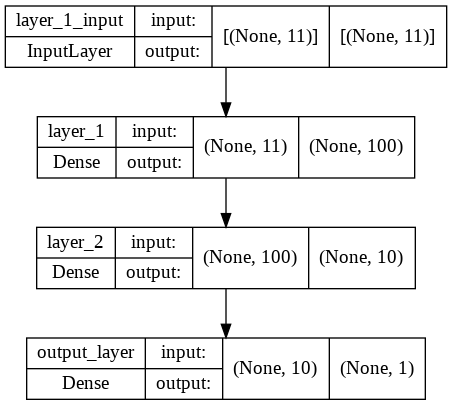

In [150]:
tf.keras.utils.plot_model(small_model, show_shapes=True) # let's see its architecture

In [313]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for
    training and validation metrics.
    """
    # Loss and Val_loss
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    # Mae and Val Mae
    mae = history.history["mae"]
    val_mae = history.history["val_mae"]
    
    # set the epochs
    epochs = range(len(history.history["loss"]))
    
    # Plot loss
    plt.figure(figsize=(20, 7))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="Training_loss", marker="o", markerfacecolor="k")
    plt.plot(epochs, val_loss, label="Val_loss", marker="o", markerfacecolor="b")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, mae, label="Training_mae", marker="o", markerfacecolor="k")
    plt.plot(epochs, val_mae, label="Val_mae", marker="o", markerfacecolor="b")
    plt.title("MAE")
    plt.xlabel("Epochs")
    plt.legend();

In [152]:
small_model.evaluate(X_test, y_test) # evaluate it...

137/137 [==============================] - 0s 2ms/step - loss: 1.8378 - mae: 1.8378


[1.8377888202667236, 1.8377888202667236]

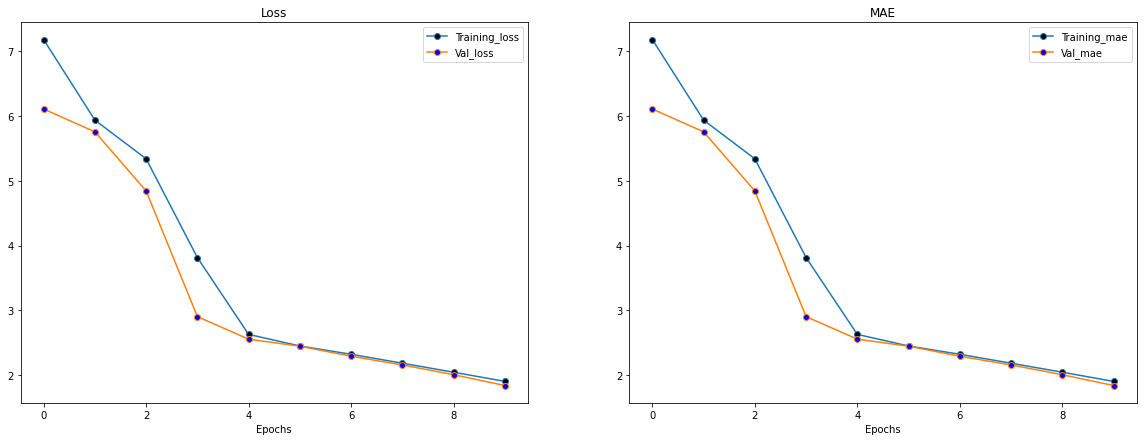

In [153]:
plot_loss_curves(small_model_history)

### **Medium Neural Network Model**

In [154]:
#Let's make a medium model
# Create the model
medium_model = tf.keras.Sequential([
    layers.Dense(200, activation="relu", input_shape=[11], name="layer_1"),
    layers.Dense(200, activation="relu", name="layer_2"),
    layers.Dense(10, activation="relu", name="layer_3"),
    layers.Dense(1, activation="relu", name="output_layer")
], name="medium_model")

# Compile the model
medium_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
medium_model_history = medium_model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=15
)

Epoch 1/15
544/544 [==============================] - 2s 3ms/step - loss: 4.0373 - mae: 4.0373 - val_loss: 2.3837 - val_mae: 2.3837
Epoch 2/15
544/544 [==============================] - 2s 3ms/step - loss: 1.2909 - mae: 1.2909 - val_loss: 0.8292 - val_mae: 0.8292
Epoch 3/15
544/544 [==============================] - 2s 3ms/step - loss: 0.9389 - mae: 0.9389 - val_loss: 0.6269 - val_mae: 0.6269
Epoch 4/15
544/544 [==============================] - 2s 3ms/step - loss: 0.7674 - mae: 0.7674 - val_loss: 1.0500 - val_mae: 1.0500
Epoch 5/15
544/544 [==============================] - 2s 3ms/step - loss: 0.6970 - mae: 0.6970 - val_loss: 0.7441 - val_mae: 0.7441
Epoch 6/15
544/544 [==============================] - 2s 3ms/step - loss: 0.6494 - mae: 0.6494 - val_loss: 0.4926 - val_mae: 0.4926
Epoch 7/15
544/544 [==============================] - 2s 3ms/step - loss: 0.6244 - mae: 0.6244 - val_loss: 1.0557 - val_mae: 1.0557
Epoch 8/15
544/544 [==============================] - 2s 3ms/step - loss: 0.

In [155]:
medium_model.summary() # see its layer

Model: "medium_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 200)               2400      
                                                                 
 layer_2 (Dense)             (None, 200)               40200     
                                                                 
 layer_3 (Dense)             (None, 10)                2010      
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 44,621
Trainable params: 44,621
Non-trainable params: 0
_________________________________________________________________


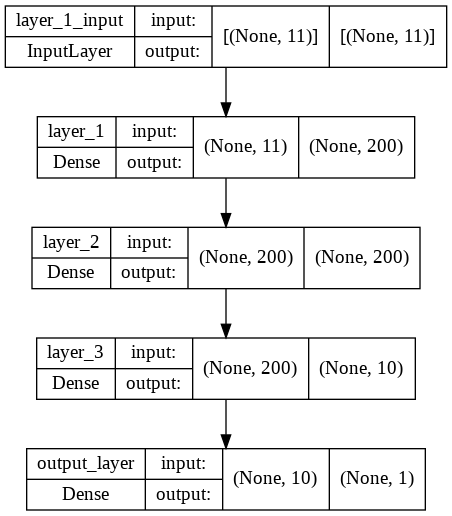

In [156]:
tf.keras.utils.plot_model(medium_model, show_shapes=True) # let's see its architecture

In [157]:
medium_model.evaluate(X_test, y_test) # evaluate it...

137/137 [==============================] - 0s 2ms/step - loss: 0.6352 - mae: 0.6352


[0.6351751685142517, 0.6351751685142517]

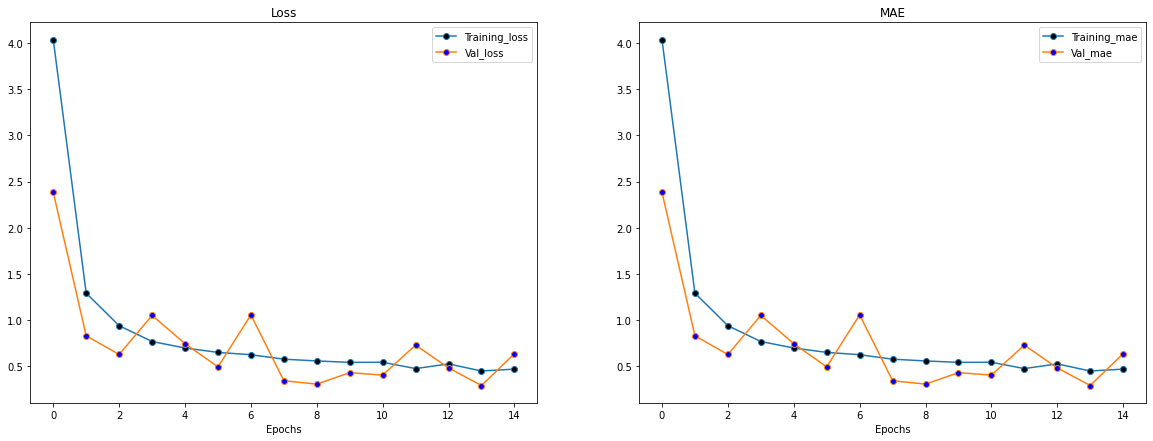

In [158]:
plot_loss_curves(medium_model_history)

### **Larger Neural Network model**

In [302]:
#Let's make a larger model!
# Create the model
larger_model = tf.keras.Sequential([
    layers.Dense(512, activation="relu", input_shape=[11], name="layer_1"),
    layers.Dense(128, activation="relu", name="layer_2"),
    layers.Dense(64, activation="relu", name="layer_3"),
    layers.Dense(8, activation="relu", name="layer_4"),
    layers.Dense(1, activation="relu", name="output_layer")
], name="larger_model")

# Compile the model
larger_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae"]
)

# Fit the model
larger_model_history = larger_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=150
)

Epoch 1/150
544/544 [==============================] - 2s 3ms/step - loss: 4.0813 - mae: 4.0813 - val_loss: 2.6850 - val_mae: 2.6850
Epoch 2/150
544/544 [==============================] - 1s 3ms/step - loss: 1.3699 - mae: 1.3699 - val_loss: 0.8790 - val_mae: 0.8790
Epoch 3/150
544/544 [==============================] - 1s 3ms/step - loss: 0.8707 - mae: 0.8707 - val_loss: 0.6104 - val_mae: 0.6104
Epoch 4/150
544/544 [==============================] - 1s 3ms/step - loss: 0.7480 - mae: 0.7480 - val_loss: 0.5933 - val_mae: 0.5933
Epoch 5/150
544/544 [==============================] - 1s 3ms/step - loss: 0.6762 - mae: 0.6762 - val_loss: 0.7313 - val_mae: 0.7313
Epoch 6/150
544/544 [==============================] - 1s 2ms/step - loss: 0.6156 - mae: 0.6156 - val_loss: 0.4577 - val_mae: 0.4577
Epoch 7/150
544/544 [==============================] - 1s 2ms/step - loss: 0.5750 - mae: 0.5750 - val_loss: 0.6769 - val_mae: 0.6769
Epoch 8/150
544/544 [==============================] - 1s 2ms/step - 

In [303]:
larger_model.summary() # see its layer

Model: "larger_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_1 (Dense)             (None, 512)               6144      
                                                                 
 layer_2 (Dense)             (None, 128)               65664     
                                                                 
 layer_3 (Dense)             (None, 64)                8256      
                                                                 
 layer_4 (Dense)             (None, 8)                 520       
                                                                 
 output_layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 80,593
Trainable params: 80,593
Non-trainable params: 0
_________________________________________________________________


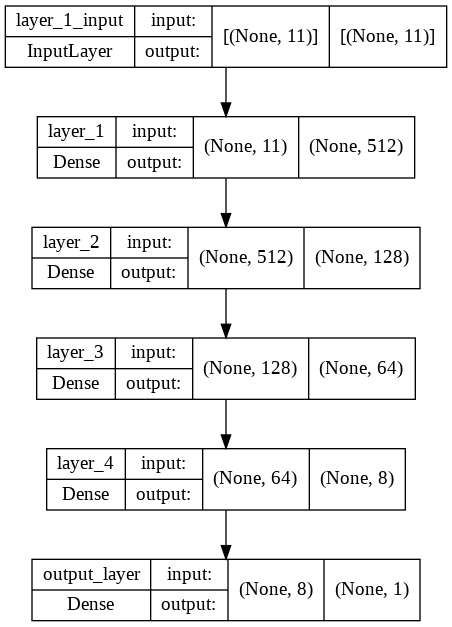

In [304]:
tf.keras.utils.plot_model(larger_model, show_shapes=True) # let's see its architecture

In [305]:
larger_model.evaluate(X_test, y_test) # evaluate it...

137/137 [==============================] - 0s 2ms/step - loss: 0.1079 - mae: 0.1079


[0.1079312115907669, 0.1079312115907669]

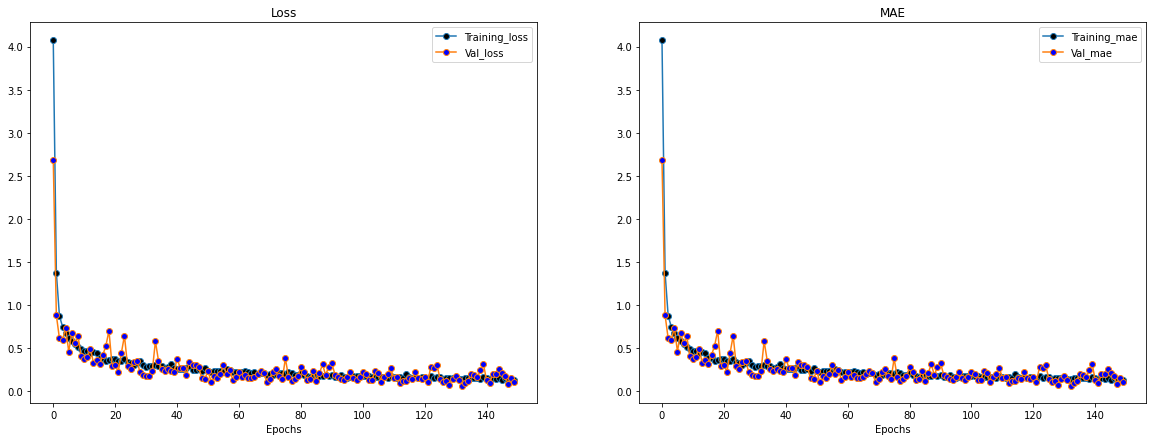

In [314]:
plot_loss_curves(larger_model_history)